In [1]:
from andylearn import mnist, KNNneighbor
import matplotlib.pyplot as plt  
import numpy as np
import scipy.linalg as slg
import math

#%matplotlib inline

In [2]:
def LE(data, k, d, t=40):
    '''
    data is the original data. m*n(m=samples, n=dimensions)
    '''
    data = np.matrix(data)
    
    N = data.shape[0]
    D = data.shape[1]
    # step 1
    # find the nearest neighbors (k). Here we get the distance from (x-y)^2
    # distance N*N
    data_tmp = np.sum(np.multiply(data, data), axis=1)
    distance=np.mat(data_tmp + data_tmp.T - 2*data*data.T)
    sort_index = np.argsort(distance,axis=1)
    # k nearest neibors
    neibors = sort_index[:,1:k+1]
    
    # step 2
    # weights
    W=np.zeros([N,N])
    D=np.zeros([N,N])
    for i in range(N):
        for j in neibors[i].A[0]:
            W[i, j] = math.exp(-distance[i, j]/t)
            W[j, i] =  W[i, j]
    for i in range(N):
        for j in range(N):
            D[i, i] +=W[i, j]
        
    # Step 3
    # eigen 
    L=D-W
    eigenValues, eigenVectors=slg.eig(L, D)
    eigenValuesIndex = np.argsort(eigenValues)  
    output = np.mat(eigenVectors[:, eigenValuesIndex[1:d+1]])
    print("LE done")
    return output


In [3]:
def LE_MNIST_acuracy(k, d):
    data, labels = mnist.load_mnist_data("./data/mnist/train-images", "./data/mnist/train-labels", 2000)
    # normalize
    data = data/256
    low_data = LE(data, k, d)
    s = KNNneighbor.accuracy(low_data[0:1000], labels[0:1000], low_data[1000:2000], labels[1000:2000], 1)   
    print("KNN score",s)
LE_MNIST_acuracy(5, 10)

data loaded


KeyboardInterrupt: 

data loaded
LE done
drawing


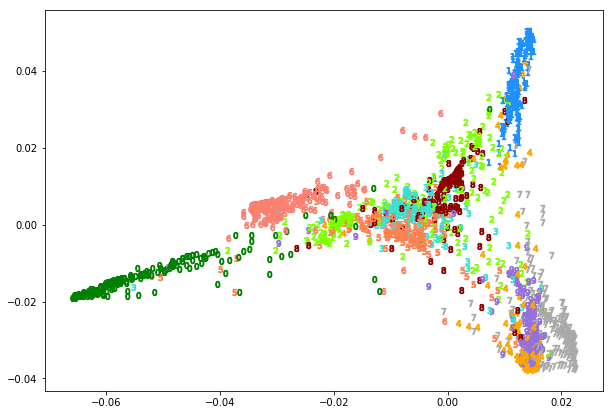

In [26]:
def LE_MNIST_2D():

    data, labels = mnist.load_mnist_data("./data/mnist/train-images", "./data/mnist/train-labels", 2000)
    # normalize
    data = data/256
    low_data = LE(data, 5, 2)


    # draw the scatters
    print("drawing")
    fig = plt.figure(figsize=(10,7))
    plotwindow = fig.add_subplot(111)
    a = np.array(low_data)
    color = ['green','dodgerblue','chartreuse','turquoise','orange','coral','salmon','darkgray','darkred','mediumpurple']
    marker = ["$0$","$1$","$2$","$3$","$4$","$5$","$6$","$7$","$8$","$9$"]
    for j in range(len(low_data)):
        plt.scatter(a[j][0], a[j][1],s=40, c=color[labels[j]],marker=marker[labels[j]])
    plt.show()
LE_MNIST_2D()